<div class="markdown-google-sans">

## **Glassdoor Pay Gap - Telling a story**
</div>

As we delve deeper into the issue of gender inequality in the workplace, it is important to examine the stark reality of the gender pay gap. Using data from Glassdoor's 2019 report, we will be taking a closer look at this pervasive issue and exploring potential solutions. Before we begin our analysis, let's first import the necessary packages and import the appropriate dataset to ensure accurate and thorough results.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt

from plotly.offline import init_notebook_mode, iplot 
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import files

In [ ]:
df = pd.read_csv('data.csv')
df['totalPay'] = df['basePay'] + df['bonus']

In [ ]:
df.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,totalPay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


<div class="markdown-google-sans">

## **Pay Gap - At the first sight**
</div>

Let's take a look at the despcriptive statistics and the distribution.

In [ ]:
n_female, n_male = df.groupby(['gender'])['jobTitle'].count()
print(f'In our dataset are {n_female} women and {n_male} men')

In our dataset are 468 women and 532 men


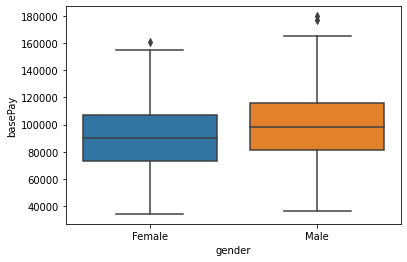

In [ ]:
sns.boxplot(data=df, x='gender',y='basePay')

In [ ]:
df.groupby(['jobTitle'])['basePay'].mean().sort_values()

jobTitle
Marketing Associate     76656.372881
Driver                  89382.208791
Warehouse Associate     89556.122222
IT                      90737.468750
Graphic Designer        90892.530612
Data Scientist          92433.420561
Sales Associate         93396.489362
Financial Analyst       94996.878505
Software Engineer      105514.935780
Manager                125329.600000
Name: basePay, dtype: float64

What field of study should you chose at CODE Berlin?

In [ ]:
female, men = df.groupby(['gender'])['basePay'].mean()
print(f'On average Women earn {int(female)}$ and men earn {int(men)}$\nMen earn {round(((men/female)-1)*100, 2)}% more then women')

On average Women earn 89942$ and men earn 98457$
Men earn 9.47% more then women


That's a pretty big gap. Men earn on average almost 10% more then women!

But as good statisticians we know that the income is not well distributed and the mean is also influenced by outliers. for this reason we're calculating the truncated mean by cutting off the upper and lower 5% based on the base income.

In [ ]:
df2 = df[df.basePay < np.percentile(df.basePay,95)]
df2 = df2[df2.basePay > np.percentile(df2.basePay,5)]

female, men = df2.groupby(['gender'])['basePay'].mean()
print(f'On average Women earn {int(female)}$ and men earn {int(men)}$\nMen earn {round(((men/female)-1)*100, 2)}% more then women')

On average Women earn 91628$ and men earn 96256$
Men earn 5.05% more then women


In [ ]:
n_female, n_male = df2.groupby(['gender'])['jobTitle'].count()
print(f'In our new and cleaned dataset are {n_female} women and {n_male} men')

In our new and cleaned dataset are 424 women and 478 men


Just by removing the the upper and lower 5% payees the pay gap went down by 4.4%. Since the **mean** heavilly depends on extreme values it makes sense to use the **truncated mean**. 

What does it tell us? 
 
Lets have a closer look at the distribution of the base pay.

On the left side we see the old distribution without the upper and lower 5% removed. From the graph we can see that there are more women receiving a lower pay than men. Even after removing the upper and lower 5% the effect is still visible as we can see in the right graph.

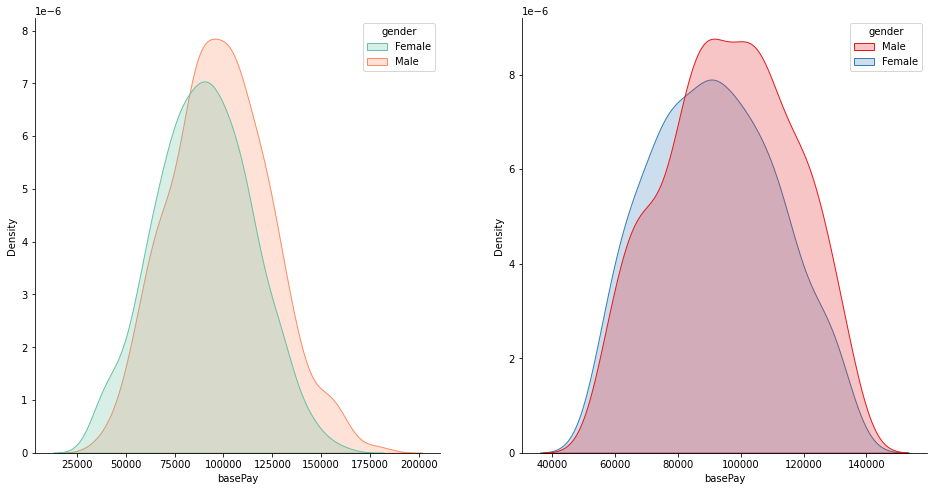

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
palette_binary_2 = sns.color_palette('Set1', 2)
palette_binary_3 = sns.color_palette('Set2', 2)
sns.kdeplot(data=df, x='basePay', hue='gender', fill=True, palette=palette_binary_3, ax=ax[0])
sns.kdeplot(data=df2, x='basePay', hue='gender', fill=True, palette=palette_binary_2, ax=ax[1])

sns.despine()
plt.show()

In [ ]:
df2.groupby(['jobTitle', 'gender'])['basePay'].mean()

jobTitle             gender
Data Scientist       Female     95147.791667
                     Male       90649.346154
Driver               Female     87848.644444
                     Male       93026.357143
Financial Analyst    Female     96649.022727
                     Male       93789.859649
Graphic Designer     Female     94428.521739
                     Male       92603.404255
IT                   Female     93598.042553
                     Male       92277.976190
Manager              Female    113942.454545
                     Male      114174.307692
Marketing Associate  Female     82618.382022
                     Male       84748.000000
Sales Associate      Female     91617.390244
                     Male       97826.782609
Software Engineer    Female     94701.000000
                     Male      100197.125000
Warehouse Associate  Female     93659.422222
                     Male       88420.976190
Name: basePay, dtype: float64

By looking at the data above we see that women and men are almost equally payed in a manager position. The clear difference seems to be in software engineering group where men get payed 6,000$ more on average.

In the next step we should have a closer look is the sex ratio in this dataset depending on the job title.

In [ ]:
title = pd.get_dummies(df, columns=['gender']).groupby('jobTitle').sum()

female = go.Pie(labels=title.index, values=title['gender_Female'], name="Female", hole=0.5, domain={'x': [0,0.46]})
male = go.Pie(labels=title.index,values=title['gender_Male'],name="Male",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Job Distribution', font=dict(size=14), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[female, male], layout=layout)
py.iplot(fig)

Something really strange is happening here. There way more men in the software engineering group than women. we remember this is the second most payed job. We also see right away that in the lowest payed sector are the most women and literally no men. ***hust**** 
The high ratio of women in the lower payed jobs and the higher ratio of men the higher payed jobs surely move our data to a certain direction. 

Next we calculate the z-score for every person. With this we can say how many standard deviations the individuum is away from the mean of their sector. We know that every z distribution should have a mean of 0 and a standard deviation of 1. After we calculated the z-score we test for the above.

In [ ]:
avg_pay = df2.groupby('jobTitle').agg({'basePay':'mean'})
std_pay = df2.groupby('jobTitle').agg({'basePay':'std'})

df2['avg_pay'] = df2['jobTitle'].apply(lambda x:avg_pay.loc[x])
df2['std_pay'] = df2['jobTitle'].apply(lambda x:std_pay.loc[x])
df2['z_score'] = (df2['basePay'] - df2['avg_pay']) / df2['std_pay']

df2.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,totalPay,avg_pay,std_pay,z_score
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604,99739.114583,19900.952985,0.439018
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476,91130.517241,19409.477070,-0.047529
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234,99739.114583,19900.952985,0.419120
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783,93506.150538,20402.746573,0.292012
5,IT,Female,20,5,PhD,Operations,4,70890,10126,81016,92975.089888,20809.567632,-1.061295


In [ ]:
df2.groupby(['jobTitle'])['z_score'].mean()
df2.groupby(['jobTitle'])['z_score'].std()

jobTitle
Data Scientist         1.0
Driver                 1.0
Financial Analyst      1.0
Graphic Designer       1.0
IT                     1.0
Manager                1.0
Marketing Associate    1.0
Sales Associate        1.0
Software Engineer      1.0
Warehouse Associate    1.0
Name: z_score, dtype: float64

In [ ]:
df2.groupby(['jobTitle', 'gender'])['z_score'].mean()

jobTitle             gender
Data Scientist       Female    0.116787
                     Male     -0.107803
Driver               Female   -0.125859
                     Male      0.134849
Financial Analyst    Female    0.087995
                     Male     -0.067926
Graphic Designer     Female    0.045208
                     Male     -0.044246
IT                   Female    0.029936
                     Male     -0.033500
Manager              Female   -0.014637
                     Male      0.003096
Marketing Associate  Female   -0.012373
                     Male      0.110120
Sales Associate      Female   -0.166690
                     Male      0.148572
Software Engineer    Female   -0.253159
                     Male      0.023014
Warehouse Associate  Female    0.130292
                     Male     -0.139599
Name: z_score, dtype: float64

We can observe the deviation from the average earnings for each gender within their respective sectors, measured in standard deviations. For instance, female Data Scientists tend to earn on average 0.1 standard deviation more than the average for their sector, while men earn 0.1 standard deviation less.

It appears that when the average z-scores for a group are similar, but with opposite signs, the sex ratio is roughly equal. Conversely, when the average z-scores differ greatly and the sex ratio is not balanced, the sex ration may not be well distributed within that group. 

These are only the group of **Software Engineers** and **Marketing Associate**. As previously established, the groups where the sex ratio is highly unequal, it would be appropriate to exclude them from our dataset and recalculate the pay gap. (We could argue to do the same with the manager group but in this case we leave this group in our dataset)

In [ ]:
df3 = df2.drop(df2[df2.jobTitle == 'Marketing Associate'].index)
df3 = df3.drop(df3[df3.jobTitle == 'Software Engineer'].index)


df3.head()

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus,totalPay
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783
5,IT,Female,20,5,PhD,Operations,4,70890,10126,81016
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541,78126
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836,122812


In [ ]:
female, men = df3.groupby(['gender'])['basePay'].mean()
print(f'On average Women earn {int(female)}$ and men earn {int(men)}$\nMen earn {round(((men/female)-1)*100, 2)}% more then women')

On average Women earn 94006$ and men earn 95646$
Men earn 1.75% more then women


In [ ]:
n_female, n_male = df3.groupby(['gender'])['jobTitle'].count()
print(f'In our dataset are {n_female} women and {n_male} men')

In our dataset are 327 women and 380 men


By removing two groups from our dataset, the pay gap changed significantly. Now, there is only a pay gap of 1.75% remaining.

From our previous calculations, we know that there is a correlation between the pay gap and education level. Let's examine this further.

In [ ]:
title = pd.get_dummies(df3, columns=['gender']).groupby('edu').sum()

female = go.Pie(labels=title.index, values=title['gender_Female'], name="Female", hole=0.5, domain={'x': [0,0.46]})
male = go.Pie(labels=title.index,values=title['gender_Male'],name="Male",hole=0.5,domain={'x': [0.52,1]})

layout = dict(title = 'Job Title Distribution', font=dict(size=14), legend=dict(orientation="h"),
              annotations = [dict(x=0.2, y=0.5, text='Female', showarrow=False, font=dict(size=20)),
                             dict(x=0.8, y=0.5, text='Male', showarrow=False, font=dict(size=20)) ])

fig = dict(data=[female, male], layout=layout)
py.iplot(fig)

The distribution appears to be fair. Upon examining the average z-scores, it is evident that there is a pay gap based on education level. Female college students tend to receive lower pay on average within their sector. We can also observe that the sample size for both groups is similar. Furthermore, it can be seen that a higher education level leads to better average pay within a sector, which favors women. However, this does not necessarily mean that women overall receive higher pay.

In [ ]:
df2.groupby(['edu', 'gender'])['z_score'].mean()

edu          gender
College      Female   -0.125972
             Male      0.009820
High School  Female   -0.142728
             Male     -0.255998
Masters      Female    0.065539
             Male      0.092813
PhD          Female    0.279853
             Male      0.133898
Name: z_score, dtype: float64

In [ ]:
df2.groupby(['edu', 'gender'])['basePay'].mean()

edu          gender
College      Female    88801.620690
             Male      96975.352381
High School  Female    88861.628319
             Male      91188.500000
Masters      Female    92389.701031
             Male      98110.724638
PhD          Female    97413.316327
             Male      98932.144144
Name: basePay, dtype: float64

<div class="markdown-google-sans">

## **Conclsuion**
</div>

From our little research we gathered the following insights:

*   The removed extreme 5% on both ends of the distribution and reduced the pay gap by nearly 50%.
*   We examined the dataset even further and realized that men are unproportional high in the group of **Software Engineers**. They are also the second best payed sector in this dataset. The lowest payed sector are the **Marketing Associate** with a really high proportion of women.
*   By removing the two groups with uneven distribution, the pay gap was reduced again.
*   We reveal a pay gap in the group of college students.
*   The results of our analysis suggest that the pay gap is heavily influenced by the different job preferences chosen by men and women. This could indicate that the gender pay gap is not solely a result of discrimination but also influenced by the choices of the individuals.
*   To prove that the pay gap is dependent on the job sector chosen, and that there are more men in higher paying sectors, we may want to investigate the distribution of men and women in different sectors and compare the average pay within each sector with bigger and different datasets.





